In [134]:
# Junlin Liu
# USC ID : 9557712632
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import confusion_matrix

#(a)
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat',sep = '\s+', names=["Pelvic_Incidence", "Pelvic_Tilt", "Lumbar_Lordosis_Angle", "Sacral_Slope", "Pelvic_Radius", "Grade_of_Spondylolisthesis", "AB/NO"])
df = pd.DataFrame(df) # get the data set
df

,Pelvic_Incidence,Pelvic_Tilt,Lumbar_Lordosis_Angle,Sacral_Slope,Pelvic_Radius,Grade_of_Spondylolisthesis,AB/NO
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


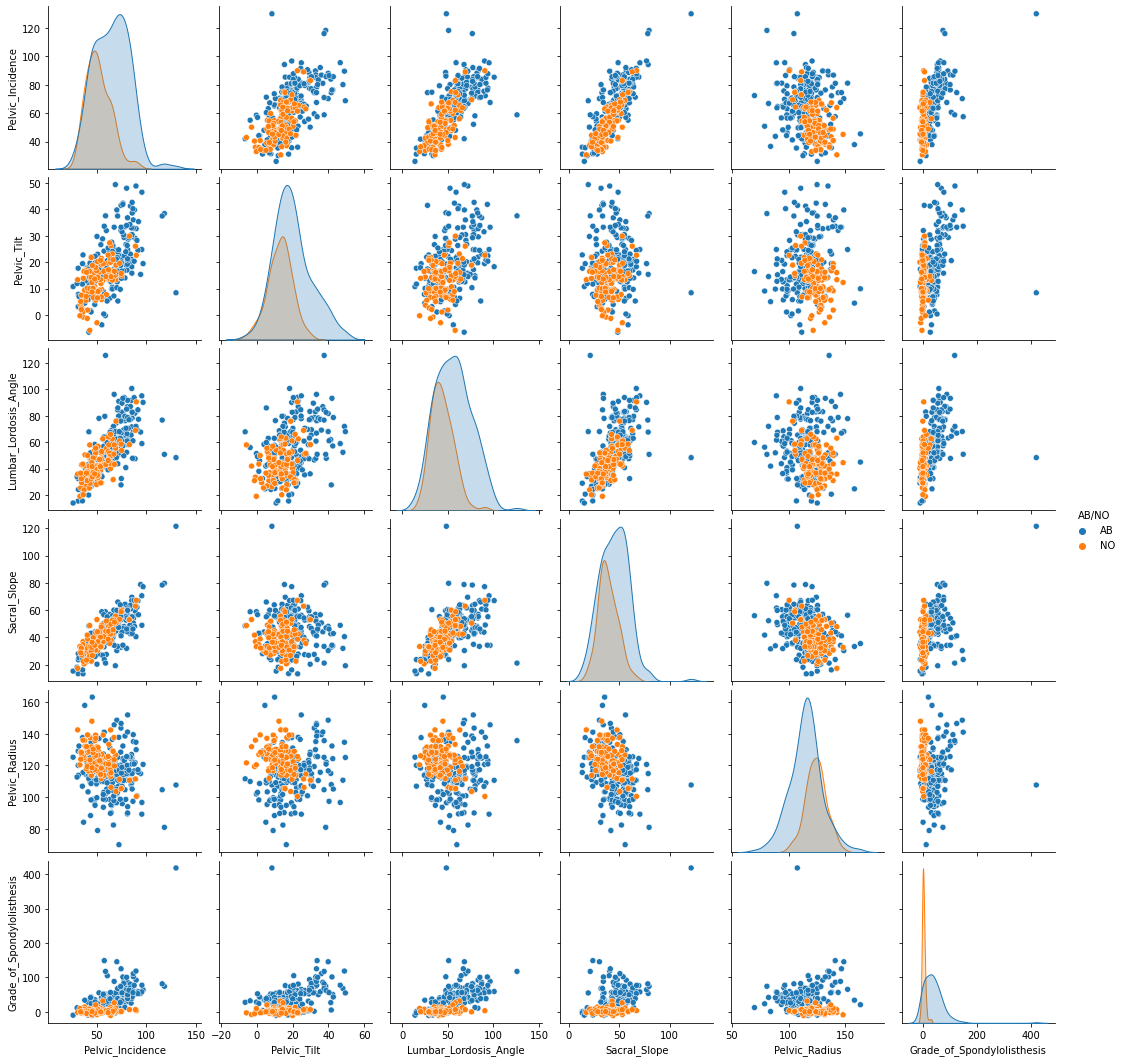

In [135]:
#(b)i.
sns.pairplot(df, hue = "AB/NO") # scatterplots for all of variables in the data

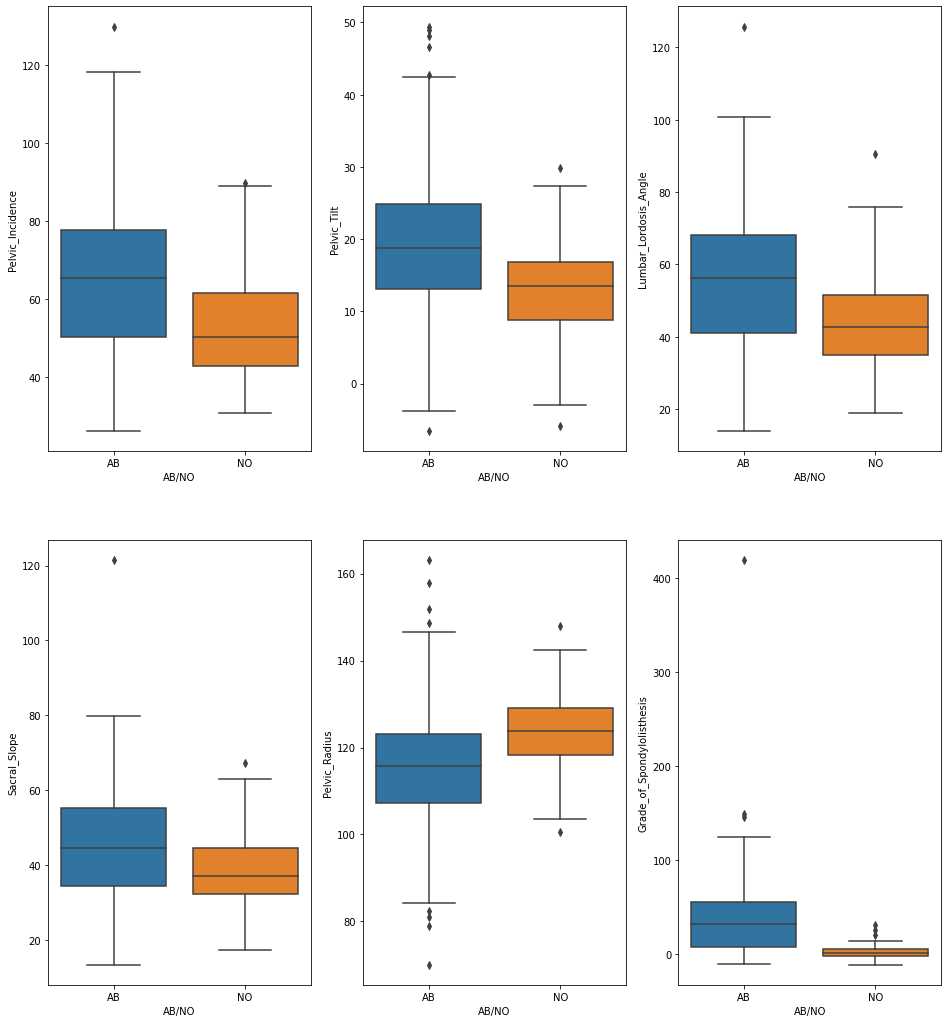

In [136]:
#(b)ii.
fig, axes = plt.subplots(2, 3, figsize=(16, 18))

for i in range(6):
  column = df.columns[i]
  sns.boxplot(ax=axes[i//3, i%3], x="AB/NO", y=column, data=df) # boxplot for the variables
plt.show()

In [137]:
#(b)iii.
df_ab = df[df['AB/NO'] == 'AB']
df_no = df[df['AB/NO'] == 'NO']
training_data = pd.concat([df_ab[0:140],df_no[0:70]]) #concat first 140 rows of AB and first 70 rows of NO to be a training data
training_data

,Pelvic_Incidence,Pelvic_Tilt,Lumbar_Lordosis_Angle,Sacral_Slope,Pelvic_Radius,Grade_of_Spondylolisthesis,AB/NO
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
275,67.29,16.72,51.00,50.57,137.59,4.96,NO
276,51.33,13.63,33.26,37.69,131.31,1.79,NO
277,65.76,13.21,44.00,52.55,129.39,-1.98,NO
278,40.41,-1.33,30.98,41.74,119.34,-6.17,NO


In [138]:
#(b)iii.
test_data = pd.concat([df_ab[140:],df_no[70:]]) #concat the rest of rows of AB and fthe rest of rows of NO to be a training data
test_data

,Pelvic_Incidence,Pelvic_Tilt,Lumbar_Lordosis_Angle,Sacral_Slope,Pelvic_Radius,Grade_of_Spondylolisthesis,AB/NO
140,69.56,15.40,74.44,54.16,105.07,29.70,AB
141,89.50,48.90,72.00,40.60,134.63,118.35,AB
142,85.29,18.28,100.74,67.01,110.66,58.88,AB
143,60.63,20.60,64.54,40.03,117.23,104.86,AB
144,60.04,14.31,58.04,45.73,105.13,30.41,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [139]:
x_train = training_data[df.columns[:-1]].values # training set
x_test = test_data[df.columns[:-1]].values # test set 
value_map = {'AB': 1, 'NO': 0} # set calssfication of AB to be 1 and NO to be 0
y_train = training_data["AB/NO"].map(value_map).values # training set
y_test = test_data["AB/NO"].map(value_map).values # test set

In [140]:
def knn_prediction(n_neighbors: int,
                   x_train=x_train,
                   x_test=x_test, y_train=y_train,
                   y_test=y_test, p=2,
                   weights="uniform",
                   metric="minkowski",
                   metric_params=None): # define a fucntion for knn
  knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=p, weights=weights,
                             metric=metric, metric_params=metric_params) # call knn function
  knn.fit(x_train,y_train) # call fit function to learn the data
  y_test_pred = knn.predict(x_test) # predict the training data
  y_train_pred = knn.predict(x_train) # predict the test data

  y_test_error = 1 - accuracy_score(y_test, y_test_pred) # train_error = 1 - accuracy of training data
  y_train_error = 1 - accuracy_score(y_train, y_train_pred) # test_error = 1 - accuracy of test data
  return y_train_error, y_test_error

Text(0.5, 1.0, 'train and test errors in k in{208,205,...,4,1}')

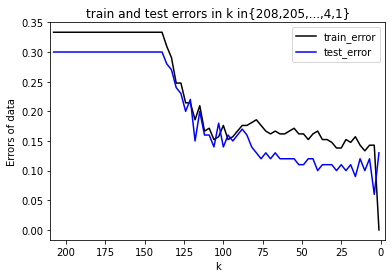

In [141]:
#(c)ii.
train_errors =[] # list to keep value of train_errors for loop
test_errors = [] # list to keep value of test_errors for loop

for k in range(1, 209, 3):
    train_error, test_error = knn_prediction(k) # call function to get train_error and test_error
    train_errors.append(train_error) # add train_errors to list
    test_errors.append(test_error) # add test_errors to list

plt.plot(range(1, 209, 3),train_errors, color = "black", label ='train_error') # plot train_errors
plt.plot(range(1, 209, 3),test_errors, color = "blue", label ='test_error') # plot test_errors
plt.xlim(210,-3)
plt.xlabel('k')
plt.ylabel('Errors of data')
plt.legend()
plt.title('train and test errors in k in{208,205,...,4,1}')

In [142]:
#(c)ii.
min_test_error = None
best_neighbor_size = None
for i in range(1,len(test_errors)): # loop to find the min_test_error and best_neighbor_size
  train_error, test_error = knn_prediction(i)
  if not min_test_error or test_error < min_test_error:
    best_neighbor_size = i # updata the best neighbor size
    min_test_error = test_error # updata the test error

print(f"best neighbor size: {best_neighbor_size}, minimum test error: {min_test_error}")

best neighbor size: 4, minimum test error: 0.06000000000000005


In [143]:
#(c)ii.
knn = KNeighborsClassifier(n_neighbors=best_neighbor_size)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
matrix = confusion_matrix(y_test, y_pred) # call function to get confusion_matrix
print(f"confusion matrix:\n{matrix}\n")

TN = matrix[0,0]
FP = matrix[0,1]
FN = matrix[1,0]
TP = matrix[1,1]
true_positive_rate = (TP/(TP+FN))
print(f"True positive rate: {true_positive_rate}")
true_negative_rate = (TN/(FP+TN))
print(f"True negative rate: {true_negative_rate}")
precision = (TP/(TP+FP))
print(f"precision: {precision}")
f1_score = 2*precision*true_positive_rate/(precision+true_positive_rate)
print(f"f1_score: {f1_score}")

confusion matrix:
[[25  5]
 [ 1 69]]

True positive rate: 0.9857142857142858
True negative rate: 0.8333333333333334
precision: 0.9324324324324325
f1_score: 0.9583333333333333


In [144]:
#(c)iii.
training_sizes = [] # list to keep the value of training_sizes
test_errors = [] # list to keep the min test error for each loop
train_error_list = []
for training_size in range(10, 220, 10):
    ab_size = training_size - training_size//3 # new training set size of AB
    no_size = training_size//3 # new training set size of NO
    cur_xtrain = np.concatenate((x_train[y_train==1,:][:ab_size], x_train[y_train==0,:][:no_size]), axis=0) # new training set
    cur_ytrain = np.append(y_train[y_train==1][:ab_size], y_train[y_train==0][:no_size]) # new training set
    min_test_error = None
    for k in range(1, training_size, 5):
        train_error, test_error = knn_prediction(k, x_train=cur_xtrain, y_train=cur_ytrain) # call function to get test error
        train_error_list.append(train_error)
        if not min_test_error or test_error < min_test_error:
            min_test_error = test_error
    training_sizes.append(training_size) # add training_size into list
    test_errors.append(min_test_error) # add min_test_error into list

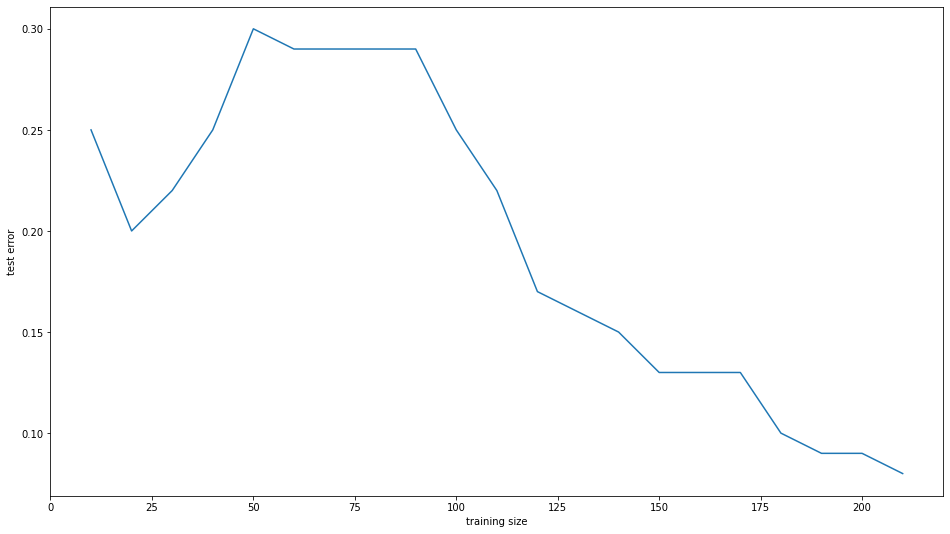

In [145]:
_, ax = plt.subplots(1, 1, figsize=(16,9))
ax.plot(training_sizes, test_errors) # plot the learning curve
ax.set_xlabel("training size")
ax.set_ylabel("test error")
plt.show()

In [146]:
#(d)i.A
def find_best_neighbor_size(metric="minkowski", metric_params=None,
                            p=2, weights="uniform", name=""): # create a function to find the best k and all test error
    min_test_error = None
    best_neighbor_size = None
    test_error_table = []
    for k in range(1, 200, 5):
        _, test_error = knn_prediction(n_neighbors=k, metric=metric,
                                   metric_params=metric_params, weights=weights, p=p) # call function get test error
        test_error_table.append(test_error) # addd test_error into test_error_table array
        
        if not min_test_error or test_error < min_test_error:
            min_test_error = test_error # updata min test error
            best_neighbor_size = k # updata k 

    print(f"When using {name} distance, "
        f"best number of neighbors is: {best_neighbor_size},"
        f" minimum test error: {min_test_error}")
    return best_neighbor_size, test_error_table

k = np.arange(1,201,5)
best_neighbor_size, test_error_table= find_best_neighbor_size(p=1, name="Manhattan")
table = pd.DataFrame({"k": k, "test_errors": test_error_table}) # Summarize the test errors as a table 
table

When using Manhattan distance, best number of neighbors is: 6, minimum test error: 0.10999999999999999


,k,test_errors
0,1,0.12
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


In [147]:
#(d)i.B
min_test_error = None
best_log_10p = None
test_errors = []
log_10p = [] # list to keep value of log10p
for i in range(10):
    log10p = 0.1*(i+1)
    p = 10**log10p # get the value of p
    
    _, test_error = knn_prediction(n_neighbors=best_neighbor_size, p=p) # call function to get test error 
    test_errors.append(test_error)
    log_10p.append(log10p)
    if not min_test_error or test_error < min_test_error:
        min_test_error = test_error
        best_log_10p = log10p

print(f"When using num neighbors={best_neighbor_size}, best log10 p is: {best_log_10p}")
table = pd.DataFrame({"log_10p": log_10p, "test_errors": test_errors}) # Summarize the test errors as a table 
table

When using num neighbors=6, best log10 p is: 0.6000000000000001


,log_10p,test_errors
0,0.1,0.09
1,0.2,0.09
2,0.3,0.08
3,0.4,0.08
4,0.5,0.08
5,0.6,0.06
6,0.7,0.07
7,0.8,0.08
8,0.9,0.09
9,1.0,0.09


In [148]:
#(d)i.C
chebyshev_best_k, test_error_table = find_best_neighbor_size(metric="chebyshev", name="chebyshev")
k = np.arange(1,201,5)
table = pd.DataFrame({"k": k, "test_errors": test_error_table}) # Summarize the test errors as a table 
table

When using chebyshev distance, best number of neighbors is: 16, minimum test error: 0.07999999999999996


,k,test_errors
0,1,0.13
1,6,0.09
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


In [149]:
#(d)ii.
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors = 3, metric ='mahalanobis', metric_params = {'V' : np.cov(x_train)})
#knn
#Mahalanobis_best_k, test_error_table = find_best_neighbor_size(metric="mahalanobis", name="mahalanobis", metric_params={'V': np.cov(x_train)}, algorithm = "brute" )
#Mahalanobis_best_k, test_error_table = find_best_neighbor_size(metric="mahalanobis", name="mahalanobis", metric_params={'V': np.cov(x_train)}, algorithm = "brute" )
Mahalanobis_best_k, test_error_table = find_best_neighbor_size(metric="mahalanobis", name="mahalanobis", metric_params={'VI': np.cov(x_train.T)})
k = np.arange(1,201,5)
table = pd.DataFrame({"k": k, "test_errors": test_error_table}) # Summarize the test errors as a table 
table

When using mahalanobis distance, best number of neighbors is: 6, minimum test error: 0.07999999999999996


,k,test_errors
0,1,0.12
1,6,0.08
2,11,0.09
3,16,0.08
4,21,0.10
5,26,0.09
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.11


In [150]:
#(e)
best_test_error_Euclidean, test_error_table = find_best_neighbor_size(name="Euclidean", weights="distance")
best_test_error_Euclidean, test_error_table = find_best_neighbor_size(name="Manhattan", p=1, weights="distance")
best_test_error_Euclidean, test_error_table = find_best_neighbor_size(name="chebyshev", metric="chebyshev", weights="distance")

When using Euclidean distance, best number of neighbors is: 6, minimum test error: 0.09999999999999998
When using Manhattan distance, best number of neighbors is: 26, minimum test error: 0.09999999999999998
When using chebyshev distance, best number of neighbors is: 16, minimum test error: 0.10999999999999999


In [152]:
#(f)
lowest_training_error = min(train_error_list)
print(f"The lowest training error rate:", lowest_training_error)

The lowest training error rate: 0.0
